# Определение перспективного тарифа для телеком компании




Клиентам федерального оператора сотовой связи - «Мегалайн», предлагают два тарифных плана: «Смарт» и «Ультра». 

### Описание тарифов:

 *Тариф "Смарт"*

 1. Ежемесячная плата: 550 рублей
 2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
 3. Стоимость услуг сверх тарифного пакета:
 - минута разговора: 3 рубля
 - сообщение: 3 рубля
 - 1 Гб интернет-трафика: 200 рублей
 
 *Тариф "Ультра"*
 
 1. Ежемесячная плата: 1950 рублей
 2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
 3.	Стоимость услуг сверх тарифного пакета:
 - минута разговора: 1 рубль
 - сообщение: 1 рубль
 - 1 Гб интернет-трафика: 150 рублей
 
Также известно, что «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

Дана небольшая выборка клиентов "Мегалайна": данные 500 пользователей: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018г. Нужно ответить на вопрос: какой тариф лучше?

Заказчик: коммерческий департамент "Мегалайн".

# Изучение общей информации о полученных файлах

Познакомимся с данными из файлов:

In [1]:

import pandas as pd

calls = pd.read_csv('/datasets/calls.csv')
calls.sample(5)

,id,call_date,duration,user_id
156159,1385_238,2018-03-14,6.71,1385
78108,1196_340,2018-10-31,19.88,1196
113779,1291_405,2018-08-29,4.67,1291
87413,1219_182,2018-07-13,10.84,1219
75197,1187_150,2018-10-26,6.24,1187


In [2]:
# Выведем на экран общую информацию о файле:
calls.info()
# отдельно выведем названия столбцов:
calls.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Index(['id', 'call_date', 'duration', 'user_id'], dtype='object')

Описание данных:

- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок


*Таблица "calls" (информация о звонках) состоит из 202607 строк и 4 столбцов, из которых 1 - содержит даты, 1 - категориальную переменную, остальные - количественные переменные. Пропусков нет. Нужно выполнить замену типа данных в столбцах:  'call_date', 'duration'*

Переходим к следующей таблице:

In [3]:
internet = pd.read_csv('/datasets/internet.csv')
internet.sample(5)

,Unnamed: 0,id,mb_used,session_date,user_id
28431,28431,1099_95,473.43,2018-08-29,1099
66933,66933,1227_530,138.35,2018-07-13,1227
68666,68666,1233_125,0.00,2018-09-07,1233
16599,16599,1057_134,870.52,2018-09-30,1057
56462,56462,1188_268,98.84,2018-09-06,1188


In [4]:
# Выведем на экран общую информацию о файле:
internet.info()
# отдельно выведем названия столбцов:
internet.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Index(['Unnamed: 0', 'id', 'mb_used', 'session_date', 'user_id'], dtype='object')

Описание данных:

-	id — уникальный номер сессии
-	mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
-	session_date — дата интернет-сессии
-	user_id — идентификатор пользователя


*Таблица 'internet' (информация об интернет-сессиях) состоит из 149396 строк и 4 столбцов, из которых 'session_date' содержит формат даты, 1 - категориальную, остальные - количественные переменные. Нужна замена типа данных в столбцах 'mb_used', 'session_date'* 

Переходим к следующей таблице:

In [5]:
messages = pd.read_csv('/datasets/messages.csv')
messages.tail(5)

,id,message_date,user_id
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499
123035,1499_183,2018-11-16,1499


In [6]:
# Выведем на экран общую информацию о файле:
messages.info()
# отдельно выведем названия столбцов:
messages.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Index(['id', 'message_date', 'user_id'], dtype='object')

Описание данных:

-	id — уникальный номер сообщения
-	message_date — дата сообщения
-	user_id — идентификатор пользователя, отправившего сообщение


*Таблица 'messages' (информация о сообщениях) состоит из 123036 строк и 3 столбцов. Нужна замена типа данных в столбце 'message_date'*

Переходим к следующей таблице:

In [7]:
tariffs = pd.read_csv('/datasets/tariffs.csv')
tariffs.tail(5)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [8]:
# Выведем на экран общую информацию о файле:
tariffs.info()
# отдельно выведем названия столбцов:
tariffs.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'tariff_name'],
      dtype='object')

Описание данных:

- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- tariff_name — название тарифа









*Таблица 'tariffs' (информация о тарифах) состоит из 2 строк, 8 столбцов, из которых 1 содержит категориальную переменную ('tariff_name'), остальные - количественную. В предобработке не нуждается.*

Переходим к следующей таблице:

In [9]:
users = pd.read_csv('/datasets/users.csv')
users.tail(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart
499,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart


In [10]:
# Выведем на экран общую информацию о файле:
users.info()
# отдельно выведем названия столбцов:
users.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Index(['user_id', 'age', 'churn_date', 'city', 'first_name', 'last_name',
       'reg_date', 'tariff'],
      dtype='object')

Описание данных:

-	user_id — уникальный идентификатор пользователя
-	age — возраст пользователя (годы)
-	churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
-	city — город проживания пользователя
-	first_name — имя пользователя
-	last_name — фамилия пользователя
-	reg_date — дата подключения тарифа (день, месяц, год)
-	tariff — название тарифного плана


*Таблица 'users' (информация о пользователях) состоит из 500 строк и 8 столбцов, из которых 2 содержат дату('reg_date', 'churn_date'), 4 - категориальную переменную ('first_name', 'last_name', 'city', 'tariff'), остальные - количественную. В столбцах 'reg_date', 'churn_date' нужно выполнить замену типа данных. В столбце 'churn_date' - пропуски.*

### Вывод:

Имеем пять таблиц, каждая из которых содержит нужную для расчетов информацию:

1) "calls" (информация о звонках). Одна строка в таблице - это один звонок, сделанный абонентом в определенную дату. Также содержит длительность разговора в минутах.

2) 'internet' (информация об интернет-сессиях). Одна строка - это одна интернет -сессия, выполненная абонентом в определенную дату. Также содержит информацию об  объёме потраченного за сессию интернет-трафика (в мегабайтах).

3)  'messages' (информация о сообщениях). Одна строка - это одно отравленное сообщение абонентом в определенную дату. 

4) 'tariffs' (информация о тарифах). Содержит характеристики, которые описывают тарифы "Ультра" и "Смарт". 

5) 'users' (информация о пользователях). Одна строка в таблице содержит информацию об абоненте компании, а именно: ФИО, возраст, город проживания. А также дату подключения, дату прекращения пользования тарифом, название тарифного плана.

Переходим к предобработке данных.



# Предобработка данных.

В каждой таблице выполним в нужных столбцах замену типа данных, посмотрим на пропуски. 

- В таблице "calls" (информация о звонках):  нужно выполнить замену типа данных в столбцах: 'call_date' - дата звонка(изменить на формат даты, чтобы была возможность работать с датами), 'duration' - длительность звонка в минутах(округлим данные до целого для удобства расчетов). Также в столбце есть значение = 0. Это аномалия, которую мы исправим.


- В таблице "internet" нужна замена типа данных в столбцах 'mb_used' - объём потраченного за сессию интернет-трафика (в мегабайтах)(округлим данные до целого для удобства расчетов), 'session_date' - дата интернет сессии(на формат даты). Также в столбце 'mb_used' есть значение = 0, которое подлежит исправлению.


- Таблица 'messages' (информация о сообщениях): нужна замена типа данных в столбце 'message_date'- дата сообщения(на формат даты)


- Таблица 'users' (информация о пользователях): в столбцах 'reg_date' - дата подключения тарифа (день, месяц, год), 'churn_date'- дата прекращения пользования тарифом нужно выполнить замену типа данных(на формат даты). В столбце 'churn_date' имеются пропуски. Пропуски заполнять не будем, т.к. нам известно, что если значение пропущено, то тариф ещё действовал на момент выгрузки данных. Будем считать что тариф действует до сих пор.


- Таблица 'tariffs' (информация о тарифах) в предобработке не нуждается.

Для экономии времени создадим функцию data_type_replacement_date(data, columns1, columns2), которая будет переводить в таблице нужный столбец (columns1) в формат даты и добавлять новый столбец (columns2), в котором будет сохранен месяц из columns1. Новый столбец потребуется в дальнейшем нам для расчетов.

Также создадим функцию data_type_replacement_integer(data, columns), которая будет заменять тип данных в нужном столбце на целочисленный.

In [11]:
# Создание функций:
def data_type_replacement_date(data, columns1, columns2):
    data[columns1] = pd.to_datetime(data[columns1], format = '%Y-%m-%d') # замена типа данных на формат даты
    data[columns2] = pd.DatetimeIndex(data[columns1]).month # Добавление нового столбца к таблице, содержащего месяц
    
    
def data_type_replacement_integer(data, columns):
    data[columns] = data[columns].astype('int')# замена типа данных на целочисленный
    

Функции созданы. Выполним преобразования в таблицах:

In [12]:
#  "calls" (информация о звонках):
data_type_replacement_date(calls, 'call_date', 'date_month')
data_type_replacement_integer(calls, 'duration')

# в таблице "internet":
data_type_replacement_date(internet, 'session_date', 'date_month')
data_type_replacement_integer(internet, 'mb_used')

# 'messages' (информация о сообщениях):
data_type_replacement_date(messages, 'message_date', 'date_month')

# 'users' (информация о пользователях):
data_type_replacement_date(users, 'reg_date', 'date_month')
# т.к. новый столбец для этих данных нам не потребуется, функцию применять не будем:
users['churn_date'] = pd.to_datetime(users['churn_date'], format = '%Y-%m-%d')

Проверим результат:

In [13]:
calls.info()
print()
internet.info()
print()
messages.info()
print()
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
id            202607 non-null object
call_date     202607 non-null datetime64[ns]
duration      202607 non-null int64
user_id       202607 non-null int64
date_month    202607 non-null int64
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 7.7+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 6 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null int64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
date_month      149396 non-null int64
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 6.8+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 4 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         

В результате: замена типа данных выполнена корректно. Новые столбцы добавлены к таблицам.

В столбцах 'mb_used','duration' есть значение = 0. Нам известно, что «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута. Поэтому заменим значение 0 на 1мин. и 1 мегабайт.

In [14]:
# Используем метод .loc():
calls.loc[calls['duration'] == 0, 'duration'] = 1
# Проверим результат:
calls.query('duration == 0')['duration'].count()

0

In [15]:
# Используем метод .loc():
internet.loc[internet['mb_used'] == 0, 'mb_used'] = 1
# Проверим результат:
internet.query('mb_used == 0')['mb_used'].count()

0

Аномалий исправлены. Переходим к расчетам.


# Расчеты

Вычислим для каждого пользователя:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя.


А также объедим все данные в одну таблицу 'total_result'. Для этого:

1) Создадим сводные таблицы для данных из таблиц calls, messages, internet (группировать данные будем по столбцам 'date_month', 'user_id')

2) Объединим полученные сводные таблицы в одну 'total_result'

3) Добавим данные к 'total_result' из таблицы users (для расчетов потребуются столбцы 'tariff', 'city')

4) выполним необходимые расчеты

1) Создадим сводные таблицы. Группировать данные будем по столбцам 'date_month', 'user_id'. Применять к значениям из столбцов 'duration', 'message_date', 'mb_used'  будем функции для подсчета количества и суммы

In [16]:
# Для данных из таблицы calls(информация о звонках):
# Используем метод pivot_table():

calls_results = calls.pivot_table(index = ['date_month', 'user_id'], values = 'duration', aggfunc = ['count','sum'])
calls_results.columns = ['count_duration', 'sum_duration'] # меняем названия столбцов
calls_results.head(5) # проверим результат

count_duration  sum_duration
date_month user_id                              
1          1005                 15            89
           1032                 61           357
           1045                  1             8
           1055                 64           523
           1071                 24           182

In [17]:
# Для данных из таблицы messages(информация о сообщениях):
# Используем метод pivot_table():
messages_result = messages.pivot_table(index = ['date_month', 'user_id'], values = 'message_date', aggfunc = 'count')
messages_result.columns = ['message_count']
messages_result.tail(5) # проверим результат

message_count
date_month user_id               
12         1493                78
           1495                84
           1496                51
           1497                17
           1499                66

In [18]:
# Для данных из таблицы internet(информация об интернет-сессиях):
# Используем метод pivot_table():
internet_result = internet.pivot_table(index = ['date_month', 'user_id'], values = 'mb_used', aggfunc = 'sum')
internet_result.columns = ['mb_used_sum'] # меняем названия столбцов
internet_result.head(5) # проверим результат

mb_used_sum
date_month user_id             
1          1005            2724
           1032           24111
           1045            2343
           1055           17073
           1071           15588

**Сводные таблицы созданы.** 

Чтобы при объединений таблиц в одну общую не потерять строки или исключить задвоение строк, выведем на экран количество строк каждой сводной таблицы.

In [19]:
# Используем метод shape:
print(calls_results.shape, 'информация о звонках')
print(messages_result.shape, 'информация о сообщениях')
print(internet_result.shape, 'информация об интернет-сессиях')

(3174, 2) информация о звонках
(2717, 1) информация о сообщениях
(3203, 1) информация об интернет-сессиях


Переходим к объединению таблиц.

2) Объединим полученные сводные таблицы в одну 'total_result'. Объединять будем по столбцам 'date_month', 'user_id'.

In [20]:
# Используем метод merge(). Чтобы не потерять строки столбцов будем использовать тип объединения 'outer' - внешний
results_total = pd.merge(calls_results, messages_result,  on = ['date_month', 'user_id'], how = 'outer')
results_total = pd.merge(results_total, internet_result, on = ['date_month', 'user_id'], how = 'outer')
results_total.head(10) # Проверим результат

count_duration  sum_duration  message_count  mb_used_sum
date_month user_id                                                          
1          1005               15.0          89.0            7.0       2724.0
           1032               61.0         357.0           38.0      24111.0
           1045                1.0           8.0            5.0       2343.0
           1055               64.0         523.0           30.0      17073.0
           1071               24.0         182.0           16.0      15588.0
           1113               18.0         104.0           14.0        767.0
           1120                5.0          52.0            NaN        656.0
           1126               35.0         251.0            4.0      16349.0
           1134               42.0         313.0           32.0      10190.0
           1135                9.0          82.0            1.0       1599.0

Проверим, что мы присоединили нужное количество строк:

In [21]:
results_total.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3214 entries, (1, 1005) to (4, 1476)
Data columns (total 4 columns):
count_duration    3174 non-null float64
sum_duration      3174 non-null float64
message_count     2717 non-null float64
mb_used_sum       3203 non-null float64
dtypes: float64(4)
memory usage: 114.0 KB


**Объединение таблиц выполнено корректно: данные не утеряны.**. Переходим к следующему шагу.

3) Добавим данные к 'total_result' из таблицы users (для расчетов потребуются столбцы 'tariff', 'city'). Объединять будем по столбцу 'user_id'. Но сначала сделаем срез таблицы users: оставим только нужные для расчетов столбцы('user_id', 'tariff', 'city')

In [22]:
# Для создания среза используем метод .loc:
users_results = users.loc[:, ['user_id',  'tariff', 'city']].copy()
users_results.tail(5)

,user_id,tariff,city
495,1495,ultra,Иркутск
496,1496,smart,Вологда
497,1497,smart,Челябинск
498,1498,smart,Владикавказ
499,1499,smart,Пермь


In [23]:
# Для объединения таблиц users_results и  results_total используем метод merge(). 
# Чтобы не потерять строки столбцов будем использовать тип объединения 'outer' - внешний
results_total = pd.merge(results_total, users_results, on = 'user_id', how = 'outer')
results_total.head(10)

,user_id,count_duration,sum_duration,message_count,mb_used_sum,tariff,city
0,1005,15.0,89.0,7.0,2724.0,smart,Набережные Челны
1,1005,69.0,420.0,38.0,7374.0,smart,Набережные Челны
2,1005,77.0,560.0,56.0,11095.0,smart,Набережные Челны
3,1005,101.0,663.0,41.0,9347.0,smart,Набережные Челны
4,1005,73.0,548.0,42.0,7862.0,smart,Набережные Челны
5,1005,80.0,560.0,47.0,9855.0,smart,Набережные Челны
6,1005,77.0,525.0,56.0,7686.0,smart,Набережные Челны
7,1005,71.0,564.0,64.0,7539.0,smart,Набережные Челны
8,1005,66.0,434.0,52.0,7009.0,smart,Набережные Челны
9,1005,100.0,673.0,44.0,7792.0,smart,Набережные Челны


In [24]:
# Проверим результат:
results_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 7 columns):
user_id           3216 non-null int64
count_duration    3174 non-null float64
sum_duration      3174 non-null float64
message_count     2717 non-null float64
mb_used_sum       3203 non-null float64
tariff            3216 non-null object
city              3216 non-null object
dtypes: float64(4), int64(1), object(2)
memory usage: 201.0+ KB


Готово. Видим, что в столбцах образовались пропуски из-за внешнего объединения таблиц. Чуть позже их заменим на 0.

**Таблицы объединили в одну общую results_total.** Переходим к расчетам.

4) Нам осталось вычислить помесячную выручку с каждого пользователя. 

Выведем описание тарифов на экран. Для этого обратимся к таблице tariffs:


In [25]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Переведем мегабайты в гигабайты для удобства расчетов, результат округлим до целого и сохраним в новый столбец 'mb_used_sum_gb':

In [26]:
# Учитывая, что в 1гб. = 1024 мегабайта. Результат округлим до целого, используя round():
results_total['mb_used_sum_gb'] = round(results_total['mb_used_sum'] / 1024)
results_total[['mb_used_sum', 'mb_used_sum_gb']].head(5)

,mb_used_sum,mb_used_sum_gb
0,2724.0,3.0
1,7374.0,7.0
2,11095.0,11.0
3,9347.0,9.0
4,7862.0,8.0


Сразу проверим не появился ли в новом столбце при округлении  0. 

In [27]:
results_total['mb_used_sum_gb'].describe()

count    3203.000000
mean       16.838589
std         7.340295
min         0.000000
25%        12.000000
50%        17.000000
75%        21.000000
max        49.000000
Name: mb_used_sum_gb, dtype: float64

Появился 0 в значениях столбца (min = 0). Заменим на 1.

In [28]:
# Используем метод .loc():
results_total.loc[results_total['mb_used_sum_gb'] == 0, 'mb_used_sum_gb'] = 1
# Проверим результат:
results_total.query('mb_used_sum_gb == 0')['mb_used_sum_gb'].count()

0

Данные переведены корректно. Добавлен новый столбец 'mb_used_sum_gb' - объем израсходованного интернет - трафика в гигабайтах. Сейчас вычислим выручку для каждого пользователя. Для этого в отдельных столбцах выведем сумму выручки за дополнительные минуты, сообщения, интернет-трафика (для удобства расчетов). Затем полученные суммы сложим с абонентской платой за месяц. Результат сохраним в новом столбце 'user_revenue' - выручка с клиента.

In [29]:
# Воспользуемся методом apply():
# Создание вспомогательных функции:
# цена за дополнительные минуты, учитывая тариф:
def no_minute(row):
    tariff = row['tariff']
    sum_duration = row['sum_duration']
    if tariff == 'ultra':
        if sum_duration > 3000:
            return (sum_duration - 3000) * 1
        return 0
    if tariff == 'smart':
        if sum_duration > 500:
            return (sum_duration - 500) * 3
        return 0
    

# цена за дополнительные сообщения, учитывая тариф:    
def no_message(row):
    tariff = row['tariff']
    message_count = row['message_count']
    if tariff == 'ultra':
        if message_count > 1000:
            return (message_count - 1000) * 1
        return 0
    if tariff == 'smart':
        if message_count > 50:
            return (message_count - 50) * 3
        return 0
    
# цена за дополнительный объем интернет-трафика, учитывая тариф:      
def no_internet(row):
    tariff = row['tariff']
    mb_used_sum_gb = row['mb_used_sum_gb']
    if tariff == 'ultra':
        if mb_used_sum_gb > 30:
            return ((mb_used_sum_gb - 30) * 150) + 1950 # сразу прибавим к цене абонентскую плату
        return 1950 #  абонентская плата
    if tariff == 'smart':
        if mb_used_sum_gb > 15:
            return ((mb_used_sum_gb - 15) * 200) + 550 # сразу прибавим к цене абонентскую плату
        return 550 #  абонентская плата
    
# Добавление столбцов с помощью apply(), в качестве агумента которой созданные функции
results_total['minute_no_price'] = results_total.apply(no_minute, axis = 1)
results_total['message_no_price'] = results_total.apply(no_message, axis = 1)
results_total['internet_no_price'] = results_total.apply(no_internet, axis = 1)
# Получение итогового столбца 'user_revenue': складываем полученные значения из трех столбцов
results_total['user_revenue'] = results_total['minute_no_price'] + results_total['message_no_price']\
                                + results_total['internet_no_price']
results_total.head(5).T # Вывод результата на экран. 


    


,0,1,2,3,4
user_id,1005,1005,1005,1005,1005
count_duration,15,69,77,101,73
sum_duration,89,420,560,663,548
message_count,7,38,56,41,42
mb_used_sum,2724,7374,11095,9347,7862
tariff,smart,smart,smart,smart,smart
city,Набережные Челны,Набережные Челны,Набережные Челны,Набережные Челны,Набережные Челны
mb_used_sum_gb,3,7,11,9,8
minute_no_price,0,0,180,489,144
message_no_price,0,0,18,0,0


В результате к таблице results_total добавлен столбец 'user_revenue' - выручка с каждого пользователя.



Заменим пропуски в столбцах на значение 0, которые образовались в результате объединения таблиц:

In [30]:
# Применим метод  fillna():
results_total[['user_revenue', 'message_count', 'sum_duration', 'mb_used_sum_gb']] = results_total[['user_revenue',
                                                                                                    'message_count', 
                                                                                                    'sum_duration', 
                                                                                                    'mb_used_sum_gb'
                                                                                                   ]].fillna(0)
# Проверим результат:
results_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 12 columns):
user_id              3216 non-null int64
count_duration       3174 non-null float64
sum_duration         3216 non-null float64
message_count        3216 non-null float64
mb_used_sum          3203 non-null float64
tariff               3216 non-null object
city                 3216 non-null object
mb_used_sum_gb       3216 non-null float64
minute_no_price      3216 non-null float64
message_no_price     3216 non-null float64
internet_no_price    3216 non-null float64
user_revenue         3216 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 326.6+ KB


Пропуски в нужных нам столбцах заполнены корректно. Проверим, есть ли дубликаты в таблице:

In [31]:
results_total.duplicated().sum()

0

Дубликатов нет.

### Вывод:

Мы получили итоговую таблицу results_total. Строки, которой содержат количество отправленных сообщений, количество объема использованного интернет - трафика в гигабайтах, продолжительность разговоров в минутах по каждому пользователю в месяц. А также выручку, которую принес каждый пользователь компании. Сейчас можно переходить к сравнению тарифов.

# Исследовательский анализ данных

Опишем поведение клиентов оператора сотовой связи "Мегалайн", учитывая выбранный тариф. 

Ответим на ряд вопросов: сколько минут разговора, сколько сообщений и какой объем интернет-трафика требуется пользователям каждого тарифа в месяц? Для этого посчитаем среднее арифметическое, дисперсию и стандартное отклонение  для столбцов 'sum_duration' - длительность разговора в минутах в месяц, 'message_count' - количество отправленных сообщений в месяц, 'mb_used_sum_gb' - объем потраченного интернет- трафика в месяц. Результаты выведем в виде таблицы.

In [32]:
# Сгруппируем данные таблицы results_total по названию тарифа. 
# Примечание: в методах var(дисперсия) и std(стандартное отклонение) в Pandas по умолчанию ddof=1. 
# Это то что нам нужно, 
#т.к. мы имеем дело с выборкой,
# а не с генеральной совокупностью.
# зададим формат для вещественных чисел: результат нужно показывать целым числом
pd.options.display.float_format = '{:.0f}'.format 
description = results_total.groupby('tariff').agg({'sum_duration': ['mean','var', 'std'],
                                                  'message_count': ['mean', 'var', 'std'],
                                                  'mb_used_sum_gb': ['mean', 'var', 'std']
                                                  })
description.T # Вывод результата на экран

tariff               smart  ultra
sum_duration   mean    385    485
               var   30820  85733
               std     176    293
message_count  mean     33     49
               var     797   2285
               std      28     48
mb_used_sum_gb mean     16     19
               var      33     97
               std       6     10

Исходя из полученной таблицы: 

***- клиенты, пользующиеся тарифом "Смарт" в среднем в месяц разговаривают ~ 385мин.(~ 6 часов), отправляют 33 сообщения, расходуют интернет-трафик объемом  ~ 16Гб.***

***- клиенты, пользующиеся тарифом "Ультра" в среднем в месяц разговаривают ~ 485мин.(~ 8 часов), отправляют 49 сообщений, расходуют интернет-трафик объемом ~18Гб.***





Опишем поведение клиентов подробнее. Построим гистограммы:

Продолжительность разговора в минутах


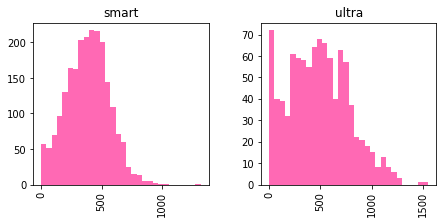

Количество сообщений


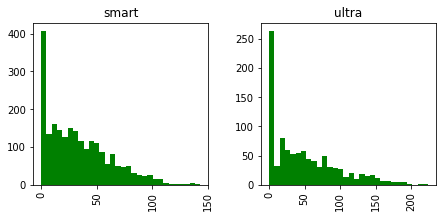

Oбъем интернет-трафика в гигабайтах


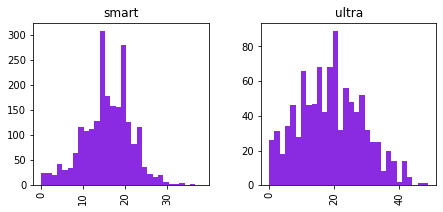

In [33]:
# Сделаем срез из таблицы results_total - оставим только нужные столбцы
total = results_total.loc[:, ['sum_duration', 
                              'message_count', 
                              'mb_used_sum_gb', 
                              'tariff']].copy()


# сгруппируем данные по тарифу и построим гистограммы
import matplotlib.pyplot as plt

    
print('Продолжительность разговора в минутах')
total.hist('sum_duration', by = 'tariff', 
           figsize = (7,3), bins = 30, color = 'hotpink') 
plt.show()

print('Количество сообщений')
total.hist('message_count', by = 'tariff', 
           figsize = (7,3), bins = 30, color = 'green')
plt.show()

print('Oбъем интернет-трафика в гигабайтах')
total.hist('mb_used_sum_gb', by = 'tariff', 
           figsize = (7,3), bins = 30, color = 'blueviolet')
plt.show()


Опишем распределения выборок:

1) 'sum_duration' - длительность разговора в минутах в месяц. Выведем описательную статистику:

In [34]:
results_total['sum_duration'].describe()

count   3216
mean     416
std      223
min        0
25%      260
50%      407
75%      543
max     1553
Name: sum_duration, dtype: float64

В результате: min = 0 - напомним, что данным значением были заполнены пропуски, которые образовались в результате внешнего объединения таблиц. Поэтому будем считать, что 0 - это выброс. Данный факт относится и к следующим столбцам, по которым будут описаны распределения ниже.

Итак, выборочное среднее ~416, значение медианы ~ 407. Это значит, что распределение имеет положительную ассиметрию, т.е. на графике виден длинный хвост и смещение данных вправо, вызванные наличием высоких значений. Разница между средним и медианой незначительна, поэтому смещение данных не сильно выделяется на графике и высоких значений в выборке немного, возвожно есть одно экстремально высокое значение, которое и смещает среднее. Так как распределение ассиметрично, будем считать значение выбросом, когда оно существенно выше Q3 или существенно ниже Q1. Чтобы сделать это утверждение более точным, мы найдем расстояние в 1,5 IQR выше Q3 и ниже Q1. Любая точка за пределами этого диапазона будет считается выбросом.

 Q1 — первый квартиль, Q3 — третий квартиль,
IQR = Q3 - Q1 (межквартильный размах, в котором находится 50% значений из выборки)

Вычислим диапазон:

In [35]:
q1 = results_total['sum_duration'].quantile(.25)
q3 = results_total['sum_duration'].quantile(.75)
iqr = q3 - q1
print('Межквартильный интервал: iqr = ', iqr)
outburst = q3 + 1.5 * iqr
print('Значения лежат в интервале от 1 до {}'.format(outburst))

Межквартильный интервал: iqr =  283.0
Значения лежат в интервале от 1 до 967.5


Итак, перед нами распределение с выборочным средним ~ 416 и оценкой стандартного отклонения ~ 223, значения которого лежат в интервале от 1 до 963. Значения, которые больше 963 - выбросы. Именно эти значения смещают среднее вправо.

2) 'message_count' - количество сообщений. 

In [36]:
# Сразу вычислим межквартильный размах:
q1 = results_total['message_count'].quantile(.25)
q3 = results_total['message_count'].quantile(.75)
iqr = q3 - q1
print('Межквартильный интервал: iqr = ', iqr)
outburst = q3 + 1.5 * iqr
print('Значения лежат в интервале от 1 до {}'.format(outburst))

Межквартильный интервал: iqr =  48.0
Значения лежат в интервале от 1 до 129.0


In [37]:
# Выведем описательную статистику: 
results_total['message_count'].describe()

count   3216
mean      38
std       36
min        0
25%        9
50%       30
75%       57
max      224
Name: message_count, dtype: float64

Перед нами распределение с выборочным средним ~ 38 и оценкой стандартного отклонения ~ 36.
Выборочное среднее ~38, значение медианы ~ 30. Это значит, что распределение имеет положительную ассиметрию, т.е. виден длинный хвост и перекос вправо, вызванные наличием высоких значений, которые и смещают среднее.  Значения лежат в интервале от 1 до 129. Значения, которые больше 129 - выбросы. 

3) 'mb_used_sum_gb' - объем израсходованного интернет - трафика в гигабайтах.

In [38]:
# Сразу вычислим межквартильный размах:
q1 = results_total['mb_used_sum_gb'].quantile(.25)
q3 = results_total['mb_used_sum_gb'].quantile(.75)
iqr = q3 - q1
print('Межквартильный интервал: iqr = ', iqr)
outburst = q3 + 1.5 * iqr
print('Значения лежат в интервале от 1 до {}'.format(outburst))

Межквартильный интервал: iqr =  9.0
Значения лежат в интервале от 1 до 34.5


In [39]:
# Выведем описательную статистику: 
results_total['mb_used_sum_gb'].describe()

count   3216
mean      17
std        7
min        0
25%       12
50%       17
75%       21
max       49
Name: mb_used_sum_gb, dtype: float64

Перед нами распределение с выборочным средним ~ 17 и оценкой стандартного отклонения ~ 7. Выборочное среднее ~17, значение медианы ~ 17. Значение равны - это значит, что выборка имеет симметричное распределение. Значения лежат в интервале от 1 до 35. Значения, которые больше 35 - выбросы. 

Распределения выборок описаны. Сейчас опишем поведение клиентов.

Выведем таблицу с описанием тарифов:

In [40]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Построим еще для наглядности графики:

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

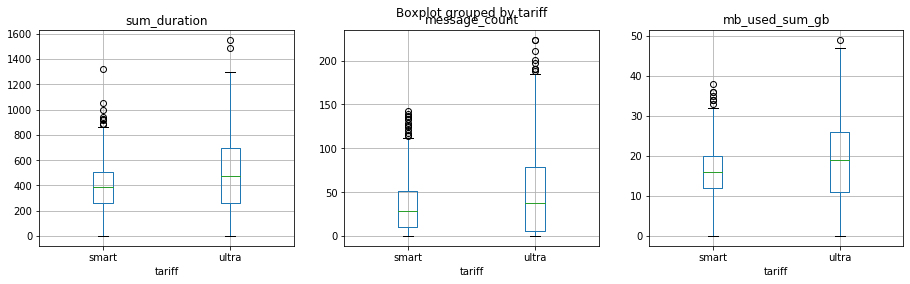

In [41]:
# Удалим выбросы из рассмотренных выше выборок:
total.query('0 < sum_duration < 963 or 0 < message_count < 129 or 0 < mb_used_sum_gb < 35')


plt.subplots(figsize = (15,4))
total.boxplot('sum_duration', by = 'tariff', ax = plt.subplot(1,3,1))
total.boxplot('message_count', by = 'tariff', ax = plt.subplot(1,3,2))
total.boxplot('mb_used_sum_gb', by = 'tariff', ax = plt.subplot(1,3,3))
plt.show()

***На графиках хорошо заметны различия между поведением клиентов двух тарифов:***

***- клиенты тарифа "Ультра" чаще всего не выговаривают 3000 мин. в месяц. Большинству клиентов  (~ 50%) хватает 500 мин. на разговоры в месяц.  Остальные ~ 50% разговаривают от 500 мин. до 1300 мин.***

***Сообщении в 1000 штук для клиентов много: большинство клиентов (~ 50%) отправляет в месяц ~ 25-50 сообщений.  Остальные ~ 50% отправляют ~ 50 - 180 сообщении в месяц***

***А вот интернет- трафик клиенты в основном расходуют в полном объеме, т.е. 30Гб. и даже больше. Большинству клиентов (~50%) хватает в месяц ~ 20 Гб. Остальные ~ 50% клиентов расходуют объем от ~ 20 до ~ 45 Гб. Получается, что доплачивают клиенты данного тарифа за дополнительный объем интернет - трафика***

***- Поведение клиентов тарифа "Смарт":***

***Большинству клиентов  (~ 50%) хватает 400 мин. на разговоры в месяц.  Остальные ~ 50% разговаривают ~ от  400 мин. до 950 мин.***

***Большинство клиентов (~ 50%) отправляет в месяц ~ 25сообщений.  Остальные ~ 50% отправляют ~ 25 - 110 сообщении в месяц***

***Большинству клиентов (~50%) хватает в месяц ~ 15 Гб. Остальные ~ 50% клиентов расходуют объем от ~ 15 до ~ 25 Гб. Получается, что ~ 50% пользователям хватает включенных 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика в месяц. А остальные ~ 50% пользователей постоянно переплачивают за дополнительные услуги.***





 


Проверим какое количество клиентов подключены к тарифам:

In [42]:
# Применим метод value_counts() для столбца 'tariff':
users['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

Клиентов тарифа "Смарт" ~в 2 раза больше по сравнению с другим тарифом. Возможно чаще всего клиенты выбирают для использования тариф "Смарт", т.к. он более доступен.

Сейчас проверим какую выручку приносят клиенты компании по каждому тарифу.



Уберем выбросы из выборки. 

Будем считать значение выбросом, когда оно существенно выше Q3 или существенно ниже Q1. Чтобы сделать это утверждение более точным, мы найдем расстояние в 1,5 IQR выше Q3 и ниже Q1. Любая точка за пределами этого диапазона считается выбросом.

 Q1 — первый квартиль, Q3 — третий квартиль,
IQR = Q3 - Q1 (межквартильный размах,в  находится 50% значений)

Вычислим диапазон:

In [43]:
q1 = results_total['user_revenue'].quantile(.25)
q3 = results_total['user_revenue'].quantile(.75)
iqr = q3 - q1
print('Межквартильный интервал: iqr = ', iqr)
outburst = q3 + 1.5 * iqr
print('Значения лежат в интервале от 1 до {}'.format(outburst))

Межквартильный интервал: iqr =  1316.75
Значения лежат в интервале от 1 до 3925.125


Значения лежат в диапазоне: (1,3925). Выбросы находятся за пределами этого диапазона. 

In [44]:
# Создадим таблицу, содержащую только столбцы с названием тарифа и соответствующую выручку с каждого пользователя.
results__user_revenue = results_total.loc[:, ['tariff', 'user_revenue']].copy()
# Удалим выбросы из выборки:
results__user_revenue = results__user_revenue.query('1 < user_revenue < 3925')


Сейчас посчитаем общую сумму, среднее арифметическое, дисперсию и стандартное отклонение. Результат представим в виде таблицы. 

In [45]:
# Выведем таблицу: сумма выручки, среднее арифметическое, дисперсия, стандартное отклонение, значение медианы:
results__user_revenue.groupby('tariff').agg({'user_revenue': ['sum','mean','var', 'std', 'median']})

user_revenue                       
                sum mean    var std median
tariff                                    
smart       2568617 1159 496790 705    950
ultra       2016450 2051 107402 328   1950

 ***Средняя выручка с пользователей, подключенных к тарифу "Ультра" ~ 2051 руб., а подключенных к тарифу "Смарт" ~ 1159 руб.***

Построим гистограмму для столбца "Выручка":

Верхний график отражает выручку по тарифу "Смарт", нижний - "Ультра"


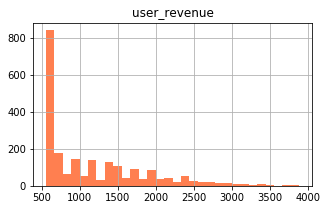

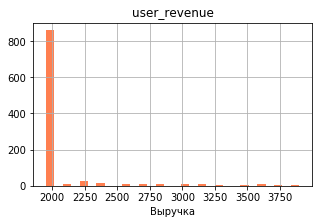

In [46]:
# Сгруппируем данные по тарифу и для столбца "Выручка" построим гистограмму:
print('Верхний график отражает выручку по тарифу "Смарт", нижний - "Ультра"')
results__user_revenue.groupby('tariff').hist('user_revenue', bins =30, figsize = (5,3), color = 'coral')
plt.xlabel('Выручка')
plt.show()


Для наглядности построим другой вид графика:

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


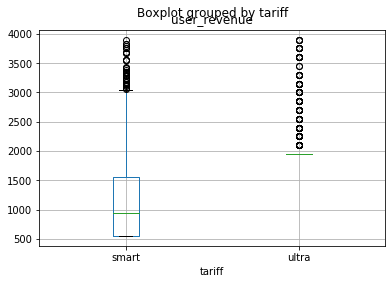

In [47]:
results__user_revenue.boxplot('user_revenue', by = 'tariff')
plt.show()

***На графике хорошо видно, что клиентам, подключенным к тарифу "Смарт", часто приходится доплачивать за услуги компании. В среднем клиент  платит в месяц ~1159 рублей, что выше ежемесячной платы в 550 рублей. Значение медианы ~ 950. Это значит, что 50% пользователей платят не меньше 950 рублей в месяц, а остальные ~50% - не больше 950 руб.***

***Клиенты, подключенные к тарифу "Ультра", в среднем в месяц платят 2051 рублей. Ежемесячная плата = 1950 рублей. Значение медианы также = 1950. Это значит, что случай переплаты очень редкие.***

***Можно заключить, что тариф "Ультра" стабильнее по сравнению с другим тарифом.***





Сформулируем и проверим гипотезу: 

*В ходе проведенного исследования было выявлено, что выборочное среднее значение по выручке с одного пользователя тарифа "Ультра" составляет ~ 2051 руб., найденное значение оценки дисперсии ~ 107402; а выборочное среднее значение по выручке с одного пользователя тарифа "Смарт" ~1159  рублей в месяц, найденное значение оценки дисперсии ~ 2568617. Можно ли считать, что разница между средними значениями существенна? Критический уровень статистической значимости установим alpha = 0.05. Если полученное значение будет меньше alpha, то отвергнем нулевую гипотезу, если больше - то основании отвергать нулевую гипотезу нет.*

Мы вправе выбрать другой критический уровень статистической значимости, например, alpha = 0.01. Но в этом случае возрастает вероятность отвергнуть верную нулевую гипотезу; если alpha = 0.10, то возрастает вероятность того, что мы примем неверную нулевую гипотезу и отвергнем верную альтернативную. Именно поэтому для данной задачи alpha = 0.05.

Проверим нулевую гипотезу о равенстве двух генеральных совокупностей.

Сформулируем нулевую гипотезу Н0: Средняя выручка тарифов "Смарт" и "Ультра" совпадает.

И альтернативную гипотезу H1: Средняя выручка тарифа "Ультра" не совпадает  со средней выручкой тарифа "Смарт".

Решение:

In [48]:
# Для удобства расчетов данные по тарифам сохраним в двух разных таблицах:
total_smart = results__user_revenue.query('tariff == "smart"')['user_revenue']
total_ultra = results__user_revenue.query('tariff == "ultra"')['user_revenue']



# Применим метод scipy.stats.ttest_ind()
from scipy import stats as st
import numpy as np
total = st.ttest_ind(total_smart, total_ultra)
alpha = .05
print('p-значение:', total.pvalue)
if (total.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 4.930624300785239e-260
Отвергаем нулевую гипотезу


Полученное  p-значение: 4.930624300785239e-260 намного меньше критического уровня значимости alpha = 0.05. Значит, есть основания отвергнуть нулевую гипотезу. Соответственно, можем предположить, что разница между средними значениями выручки по двум тарифам существенна.


***Из всего вышесказанного предполагаем: тариф "Ультра" для компании "Мегалайн" выгоднее.***



Разделим клиентов компаний "Мегалайн" на две группы: тех кто проживает в г.Москва и тех кто - в регионах. И вычислим чему равна средняя выручка в этих группах.

In [49]:
# Преобразуем данные в столбце 'city' таблицы results_total: значения, 
# не соответствующие "Москва" заменим на "Регионы":
# Применим метод.loc():
results_total.loc[results_total['city'] != 'Москва', 'city'] = 'Регионы'
# Удалим выбросы в столбце выручка:
results_total = results_total.query('1 < user_revenue < 3925')
# Проверим результат:
results_total['city'].sample(10)

2603    Регионы
1352    Регионы
1451    Регионы
687     Регионы
3083    Регионы
117     Регионы
495     Регионы
1800    Регионы
962     Регионы
84      Регионы
Name: city, dtype: object

Посчитаем общую сумму выручки, среднее арифметическое, оценку дисперсии, оценку стандартного отклонения, медиану. Результат выведем на экран в виде таблицы:

In [50]:
# Сгруппируем клиентов по столбцу 'city', 'tariff'

results_total_city = results_total.pivot_table(index = 'city', 
                                               columns = 'tariff', 
                                               values = 'user_revenue',
                                               aggfunc = ['sum', 'mean', 'var', 'std', 'median'], 
                                              margins = True
                                              )
results_total_city

sum                  mean               var                 std  \
tariff    smart   ultra     All smart ultra  All  smart  ultra    All smart   
city                                                                          
Москва   430162  463950  894112  1117  2062 1466 434989 107936 522083   660   
Регионы 2138455 1552500 3690955  1168  2048 1426 509585 107341 552224   714   
All     2568617 2016450 4585067  1159  2051 1433 496790 107402 546561   705   

                  median             
tariff  ultra All  smart ultra  All  
city                                 
Москва    329 723    904  1950 1586  
Регионы   328 743    950  1950 1446  
All       328 739    950  1950 1518

***Средняя выручка c пользователя из г.Москва ~ 1466 руб.; средняя выручка с пользователя из регионов ~ 1426 руб.***

Сформулируем и проверим гипотезу: 

*В ходе проведенного исследования было выявлено, что выборочное среднее значение по выручке с одного пользователя из г.Москва составляет ~ 1466 руб., найденное значение оценки дисперсии ~ 522083; а выборочное среднее значение по выручке с одного пользователя, проживающего в регионах ~1426  рублей в месяц, найденное значение оценки дисперсии ~ 552224. Можно ли считать, что разница между средними значениями незначительна? Критический уровень статистической значимости установим alpha = 0.05. Если полученное значение будет меньше alpha, то отвергнем нулевую гипотезу, если больше - то основании отвергать нулевую гипотезу нет.*


Проверим нулевую гипотезу о равенстве двух генеральных совокупностей.

Сформулируем нулевую гипотезу Н0: Средняя выручка с пользователя из г.Москвы не отличается от средней выручки клиента, проживающего в регионах. 

И альтернативную гипотезу H1: Средняя выручка пользователя из г.Москвы  существенно отличается от средней выручки пользователя из регионов.

Решение:


In [51]:
# Для удобства расчетов данные по городам сохраним в двух разных таблицах:
total_moscow = results_total.query('city == "Москва"')['user_revenue']
total_regions = results_total.query('city == "Регионы"')['user_revenue']



# Применим метод scipy.stats.ttest_ind()
from scipy import stats as st
import numpy as np
total = st.ttest_ind(total_moscow, total_regions)
alpha = .05
print('p-значение:', total.pvalue)
if (total.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.22787090157874135
Не получилось отвергнуть нулевую гипотезу


Полученное  p-значение: 0.22787090157874135 больше значения критического уровня значимости alpha = 0.05. Значит,  оснований отвергнуть нулевую гипотезу нет. Соответственно, можем предположить, что разница между средними значениями выручки по двум тарифам незначительна.



# Вывод:

Итак, в ходе работы над данным проектом было установлено: сколько минут разговора, сколько сообщений и какой объем интернет - трафика требуется пользователям тарифа "Смарт" и "Ультра" в месяц. Установлено характерное поведение клиентов оператора.

- Пользователям тарифа "Ультра" достаточно ~ 1500 мин. разговора, ~ 200 штук сообщений, ~ 40 Гб. интернет-трафика в месяц.
Чаще всего пользователи данного тарифа не выговаривают 3000 мин. и 1000 штук сообщении не отправляют. А вот интернет- трафика не хватает. 

- Пользователи тарифа "Смарт" поделены на две группы: ~50% клиентам достаточно включенных в тариф услуг; ~50% клиентов не достаточно. Им требуется ~ до 1000 мин. разговора, ~ 110 штук сообщении, ~ до 25Гб. интернет - трафика. 

Также была расчитана выручка с пользователей для каждого тарифа. Выведем результат в виде таблицы:

In [52]:
results__user_revenue.groupby('tariff').agg({'user_revenue': ['sum','mean']})

user_revenue     
                sum mean
tariff                  
smart       2568617 1159
ultra       2016450 2051

Выведем график:

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


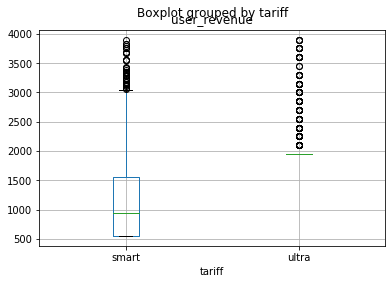

In [53]:
results__user_revenue.boxplot('user_revenue', by = 'tariff')
plt.show()

**Средняя выручка с пользователей, подключенных к тарифу "Ультра" ~ 2051 руб., а подключенных к тарифу "Смарт" ~ 1159 руб.**

На графике хорошо видно разницу: 

значение медианы для тарифа "Смарт" ~ 950 руб. Это значит, что ~ 50%  пользователей платят не больше 950 рублей, а вторая ~ 50% - не меньше 950 рублей. И если учесть, что абонентская плата за данный тариф = 550 рублей, то получается ~ 50% постоянно переплачивают. С большой вероятностью можно предположить что рано или поздно такие клиенты уйдут к конкурентам на более выгодные условия.

Значение медианы для тарифа "Ультра" = 1950. Оно совпадает с ежемесячной платой за тариф. В основном клиенты данного тарифа доплачивают за дополнительный объем интернет - трафика и то незначительно. 

В ходе исследования была выдвинута и подтверждена гипотеза о том, что средняя выручка пользователей тарифов "Смарт" и "Ультра" различается.  Pазница между средними значениями выручки по двум тарифам существенна.

Из всего вышесказанного предполагаем: тариф "Ультра" для компании "Мегалайн" выгоднее. Прежде всего стабильностью.


Также была выдвинута и опровергнута гипотеза о том, что средняя выручка  пользователей из Москвы отличается от выручки пользователей из других регионов. Значит мы можем предположить, что средняя выручка пользователей из Москвы и пользователей из регионов отличается незначительно. Выведем результат в виде таблицы:

In [54]:

results_total_city = results_total.pivot_table(index = 'city', 
                                               columns = 'tariff', 
                                               values = 'user_revenue',
                                               aggfunc = ['sum', 'mean'], 
                                              margins = True
                                              )
results_total_city

sum                  mean           
tariff    smart   ultra     All smart ultra  All
city                                            
Москва   430162  463950  894112  1117  2062 1466
Регионы 2138455 1552500 3690955  1168  2048 1426
All     2568617 2016450 4585067  1159  2051 1433

Из всего вышесказанного возникло предложение: создать новый тариф на выгодных условий для ~ 50% пользователей тарифа "Смарт", которые платят не меньше  ~ 950 рублей в месяц. Чтобы клиенты не ушли к конкурентам.